In [ ]:
# Installing packages
!pip install watermark
!pip install pydotplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00


In [ ]:
# Import of libraries

# System libraries
import re
import string
import unicodedata
import itertools
from collections import Counter

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Colab Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Colab Notebook: 3.11.12
Author: Library versions

seaborn   : 0.13.2
re        : 2.2.1
platform  : 1.0.8
matplotlib: 3.10.0
pandas    : 2.2.2
plotly    : 5.24.1
numpy     : 2.0.2
watermark : 2.5.0



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/HIV_dataset.csv")

df = df.drop("Educational_Background", axis=1)

Mounted at /content/drive


In [ ]:
df

,Age,Marital Staus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


In [ ]:
df.head()

,Age,Marital Staus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,YES,NO,Internet,Heterosexual,YES,POSITIVE


In [ ]:
df.tail()

,Age,Marital Staus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drug- taking,Result
693,19,UNMARRIED,YES,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,NO,NO,Public Bath,Heterosexual,YES,POSITIVE
697,46,Cohabiting,YES,YES,NO,Internet,Homosexual,NO,POSITIVE


In [ ]:
df.shape

(698, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   HIV_TEST_IN_PAST_YEAR           698 non-null    object
 4   AIDS_education                  698 non-null    object
 5   Places_of_seeking_sex_partners  676 non-null    object
 6   SEXUAL_ORIENTATION              698 non-null    object
 7   Drug- taking                    698 non-null    object
 8   Result                          698 non-null    object
dtypes: int64(1), object(8)
memory usage: 49.2+ KB


In [ ]:
df.dtypes

,0
Age,int64
Marital Staus,object
STD,object
HIV_TEST_IN_PAST_YEAR,object
AIDS_education,object
Places_of_seeking_sex_partners,object
SEXUAL_ORIENTATION,object
Drug- taking,object
Result,object


In [ ]:
df.Result.value_counts()

,count
Result,
NEGATIVE,349
POSITIVE,343
Positive,3
Negative,3


In [ ]:
data = df

In [ ]:
# Convert all columns to lowercase except 'Age'
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of string type
        data[col] = data[col].str.lower()

In [ ]:
data.Result.value_counts()

,count
Result,
negative,352
positive,346


In [ ]:
data.columns = data.columns.str.replace(r'[^\w]', '', regex=True).str.strip()

In [ ]:
# Check for any missing values
data.isnull().sum()

,0
Age,0
MaritalStaus,0
STD,0
HIV_TEST_IN_PAST_YEAR,0
AIDS_education,0
Places_of_seeking_sex_partners,22
SEXUAL_ORIENTATION,0
Drugtaking,0
Result,0


In [ ]:
data = data.fillna('None')

In [ ]:
# Check for any missing values
data.isnull().sum()

,0
Age,0
MaritalStaus,0
STD,0
HIV_TEST_IN_PAST_YEAR,0
AIDS_education,0
Places_of_seeking_sex_partners,0
SEXUAL_ORIENTATION,0
Drugtaking,0
Result,0


In [ ]:
missing_data = data.isnull()

print("Missing data by column:")
missing_data


Missing data by column:


,Age,MaritalStaus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drugtaking,Result
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
693,False,False,False,False,False,False,False,False,False
694,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False


In [ ]:
total_missing = data.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# **Exploratory Data Analysis and Data Visualization**

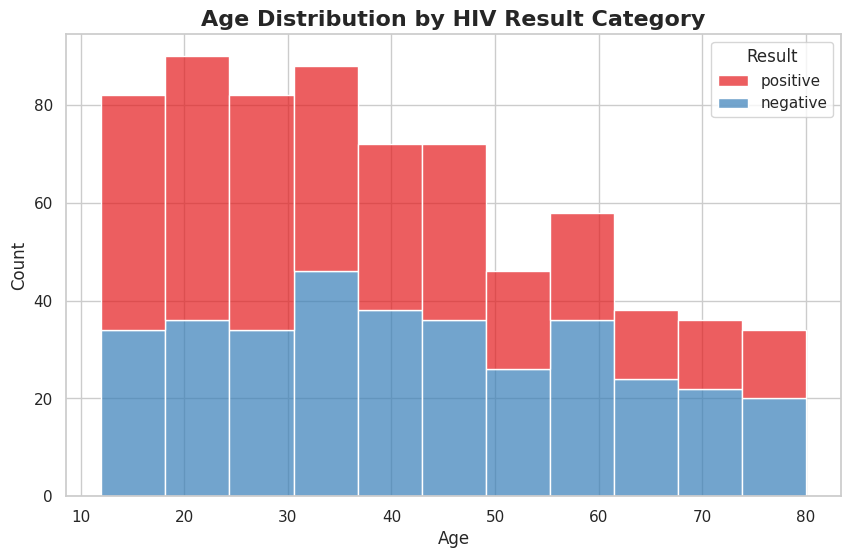

In [ ]:
# Age Distribution by Patient Category
plt.figure(figsize=(10, 6))

# Create the histogram
bars = sns.histplot(data=df, x='Age', hue='Result', multiple='stack', palette='Set1', alpha=0.7)

# Add a title
plt.title('Age Distribution by HIV Result Category', fontsize=16, fontweight='bold')  # Customize the title
plt.show()

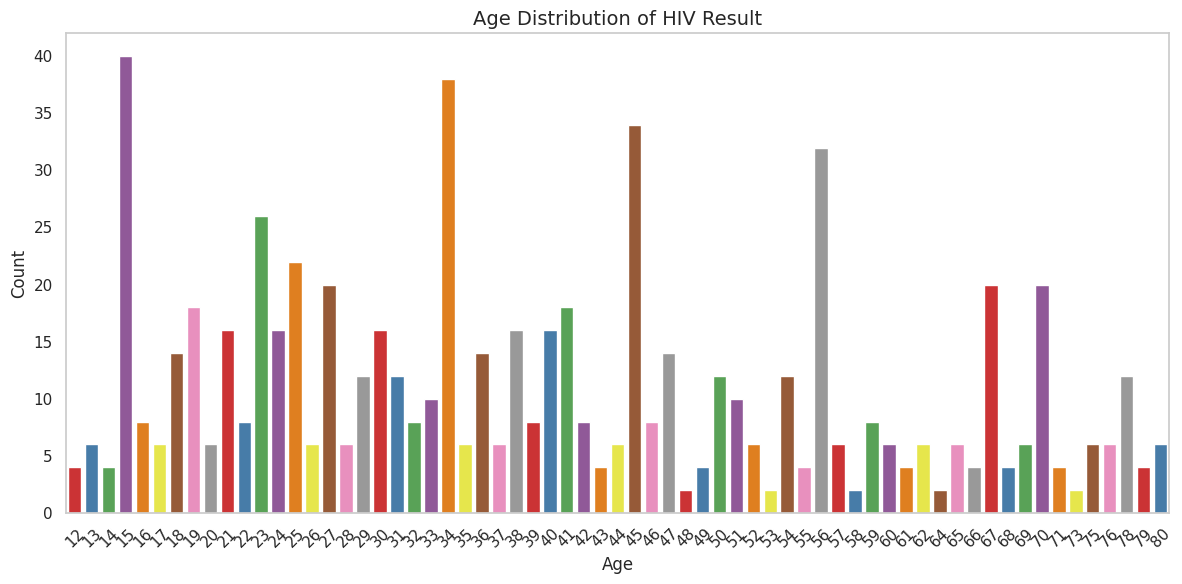

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a count plot for the 'Age' column
sns.countplot(x="Age", data=df, palette="Set1")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('Age Distribution of HIV Result', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()  # Ensure all elements fit within the figure bounds
plt.grid(False)  # Disable grid lines for a cleaner look

plt.show()  # Display the plot


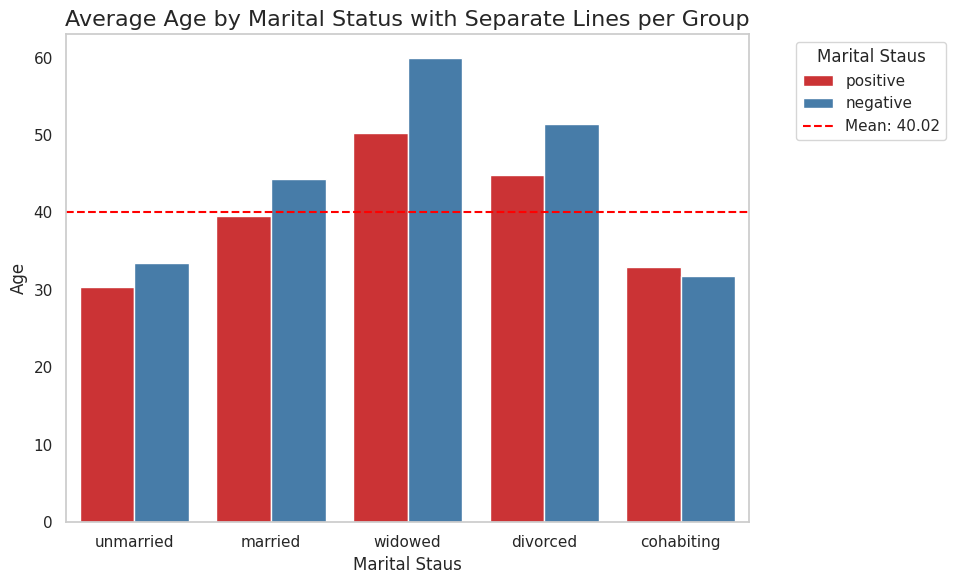

In [ ]:
# Set up the figure

plt.figure(figsize=(10, 6))
# Create the barplot
bars = sns.barplot(x="MaritalStaus", y="Age", data=data, hue="Result", ci=None, palette="Set1")

mean_height = data['Age'].mean()
plt.axhline(mean_height, color='red', linestyle='--', label=f'Mean: {mean_height:.2f}')

# Add title and labels
plt.title('Average Age by Marital Status with Separate Lines per Group', fontsize=16)
plt.xlabel('Marital Staus', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adjust the legend position
plt.legend(title='Marital Staus', loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.tight_layout()
plt.grid(False)
plt.show()


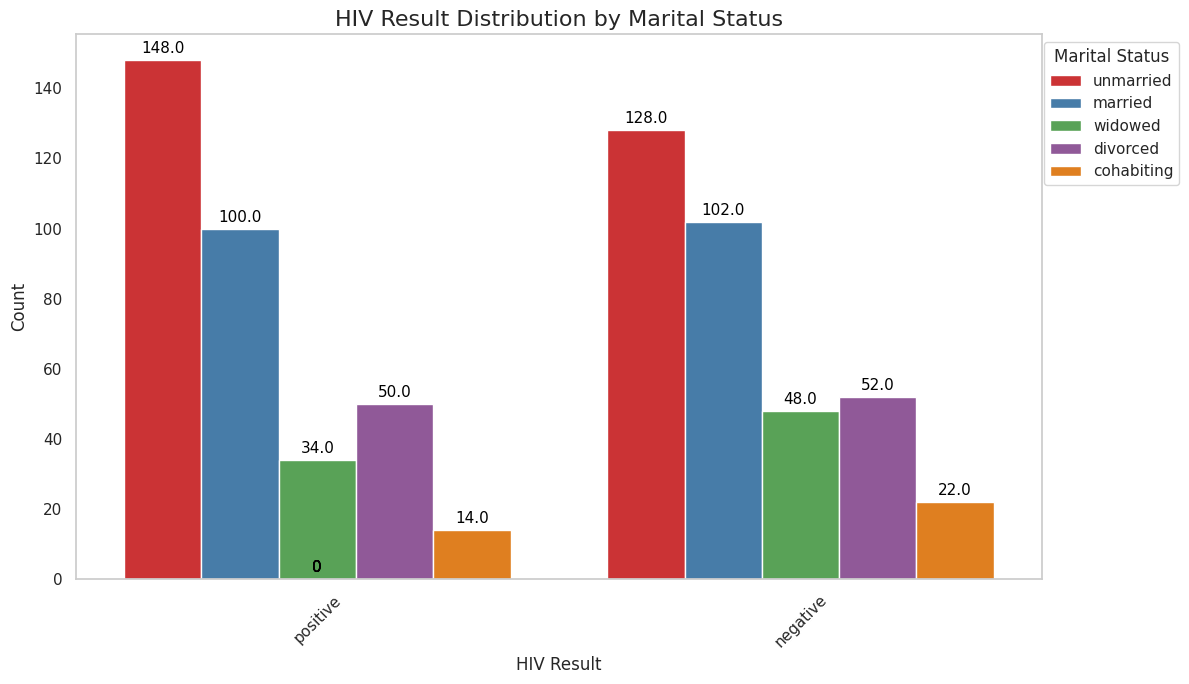

In [ ]:
plt.figure(figsize=(12, 7))  # Adjusted figure size
sns.countplot(data=data, x='Result', hue='MaritalStaus', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and axis labels
plt.title('HIV Result Distribution by Marital Status', fontsize=16)
plt.xlabel('HIV Result', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add annotations to each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Move the legend
plt.legend(title='Marital Status', loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.tight_layout()  # Ensure everything fits
plt.grid(False)
plt.show()

In [ ]:
data

,Age,MaritalStaus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drugtaking,Result
0,22,unmarried,no,yes,no,bar,heterosexual,yes,positive
1,20,unmarried,no,no,yes,None,heterosexual,no,negative
2,23,married,yes,no,yes,None,bisexual,no,negative
3,24,married,no,yes,yes,park,heterosexual,yes,positive
4,18,unmarried,yes,yes,no,internet,heterosexual,yes,positive
...,...,...,...,...,...,...,...,...,...
693,19,unmarried,yes,no,no,internet,heterosexual,no,positive
694,47,married,no,no,yes,bar,bisexual,no,negative
695,34,unmarried,yes,yes,yes,park,homosexual,yes,negative
696,25,married,no,no,no,public bath,heterosexual,yes,positive


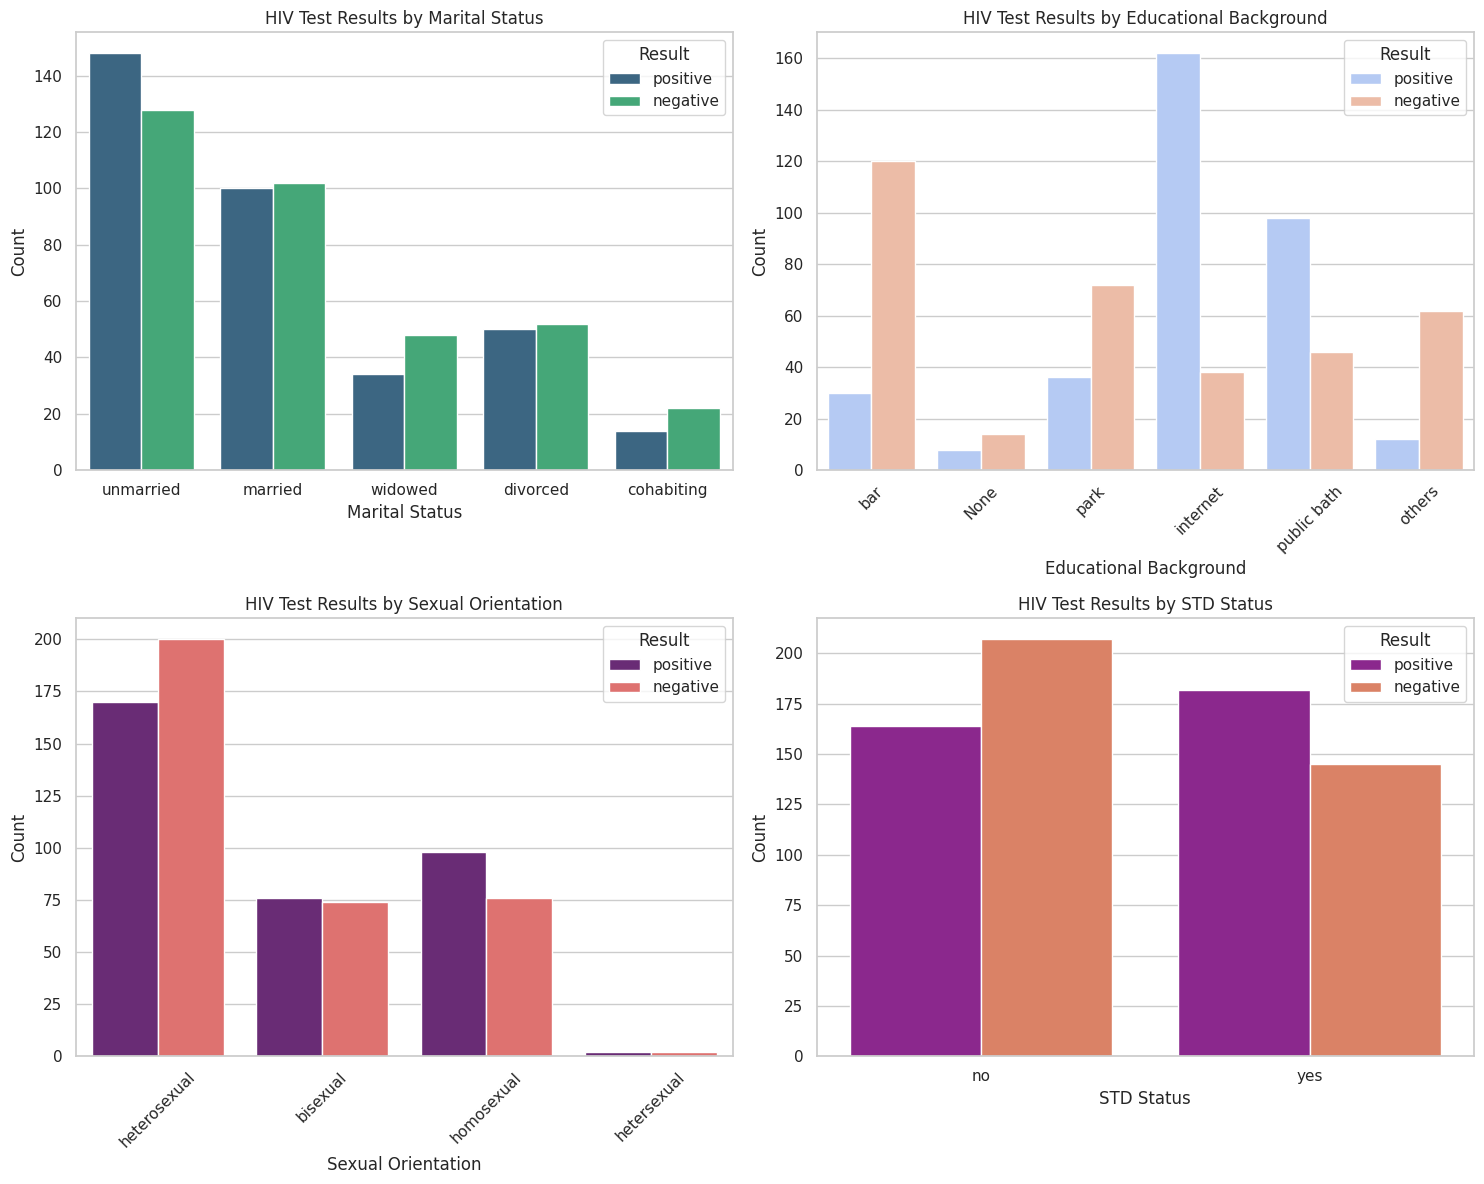

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style of the visualizations
sns.set_theme(style="whitegrid")

# Create a subplot to visualize HIV test results by demographic groups
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: HIV Test Results by Marital Status
sns.countplot(data=data, x='MaritalStaus', hue='Result', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('HIV Test Results by Marital Status')
axes[0, 0].set_xlabel('Marital Status')
axes[0, 0].set_ylabel('Count')

# Plot 2: HIV Test Results by Educational Background
sns.countplot(data=data, x='Places_of_seeking_sex_partners', hue='Result', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('HIV Test Results by Educational Background')
axes[0, 1].set_xlabel('Educational Background')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: HIV Test Results by Sexual Orientation
sns.countplot(data=data, x='SEXUAL_ORIENTATION', hue='Result', ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('HIV Test Results by Sexual Orientation')
axes[1, 0].set_xlabel('Sexual Orientation')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: HIV Test Results by STD Status
sns.countplot(data=data, x='STD', hue='Result', ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('HIV Test Results by STD Status')
axes[1, 1].set_xlabel('STD Status')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


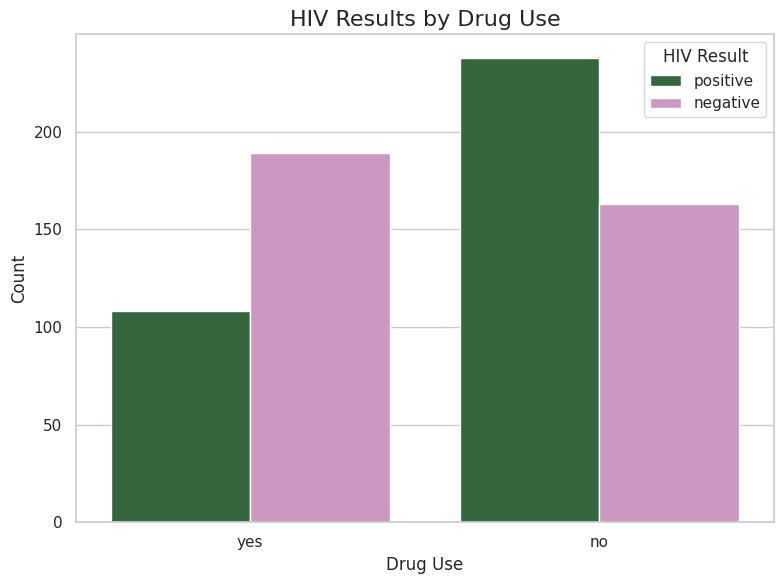

In [ ]:
# Create a bar chart comparing HIV results among drug users and non-drug users
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Drugtaking', hue='Result', palette='cubehelix')

# Set titles and labels
plt.title('HIV Results by Drug Use', fontsize=16)
plt.xlabel('Drug Use', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='HIV Result', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


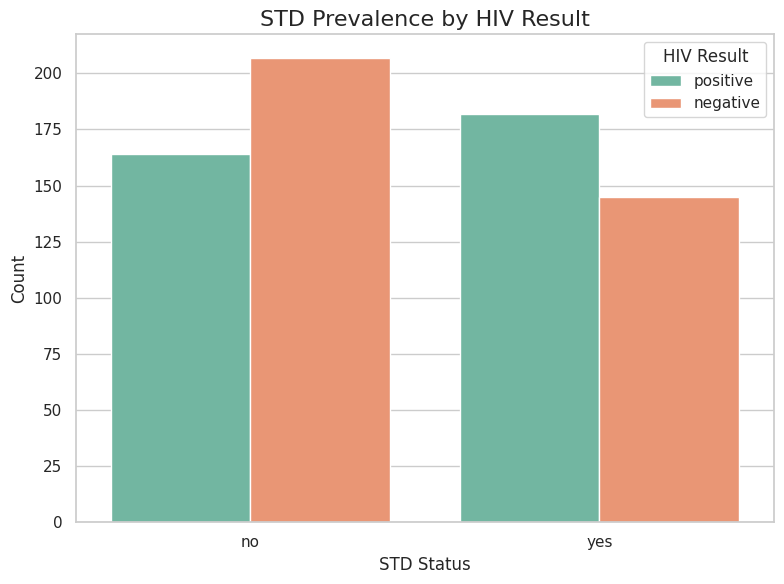

In [ ]:
# Create a bar chart showing STD prevalence among individuals with positive or negative HIV results
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='STD', hue='Result', palette='Set2')

# Set titles and labels
plt.title('STD Prevalence by HIV Result', fontsize=16)
plt.xlabel('STD Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='HIV Result', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


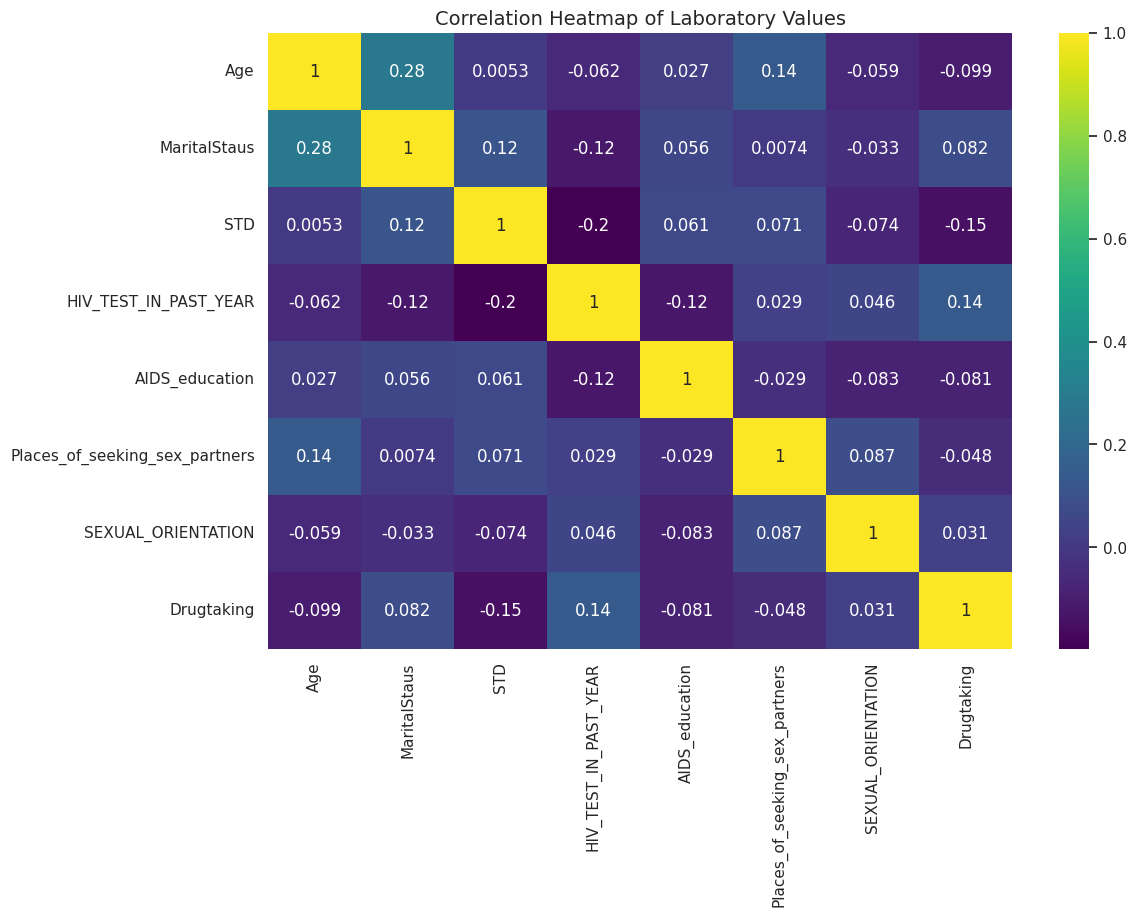

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select the columns you want for correlation
cols_for_corr = ['Age', 'MaritalStaus', 'STD', 'HIV_TEST_IN_PAST_YEAR', 'AIDS_education', 'Places_of_seeking_sex_partners', 'SEXUAL_ORIENTATION', 'Drugtaking']
selected_df = data[cols_for_corr]

# Convert categorical columns to numerical using Label Encoding or One-Hot Encoding
# Here, we'll use Label Encoding for simplicity
for col in selected_df.select_dtypes(include=['object']).columns:
    selected_df[col] = pd.factorize(selected_df[col])[0] # Factorize converts categories to numerical labels

plt.figure(figsize=(12, 8))

# Now, calculate the correlation matrix and plot the heatmap
sns.heatmap(selected_df.corr(), annot=True, cmap='viridis')

plt.title('Correlation Heatmap of Laboratory Values', fontsize=14)
plt.show()

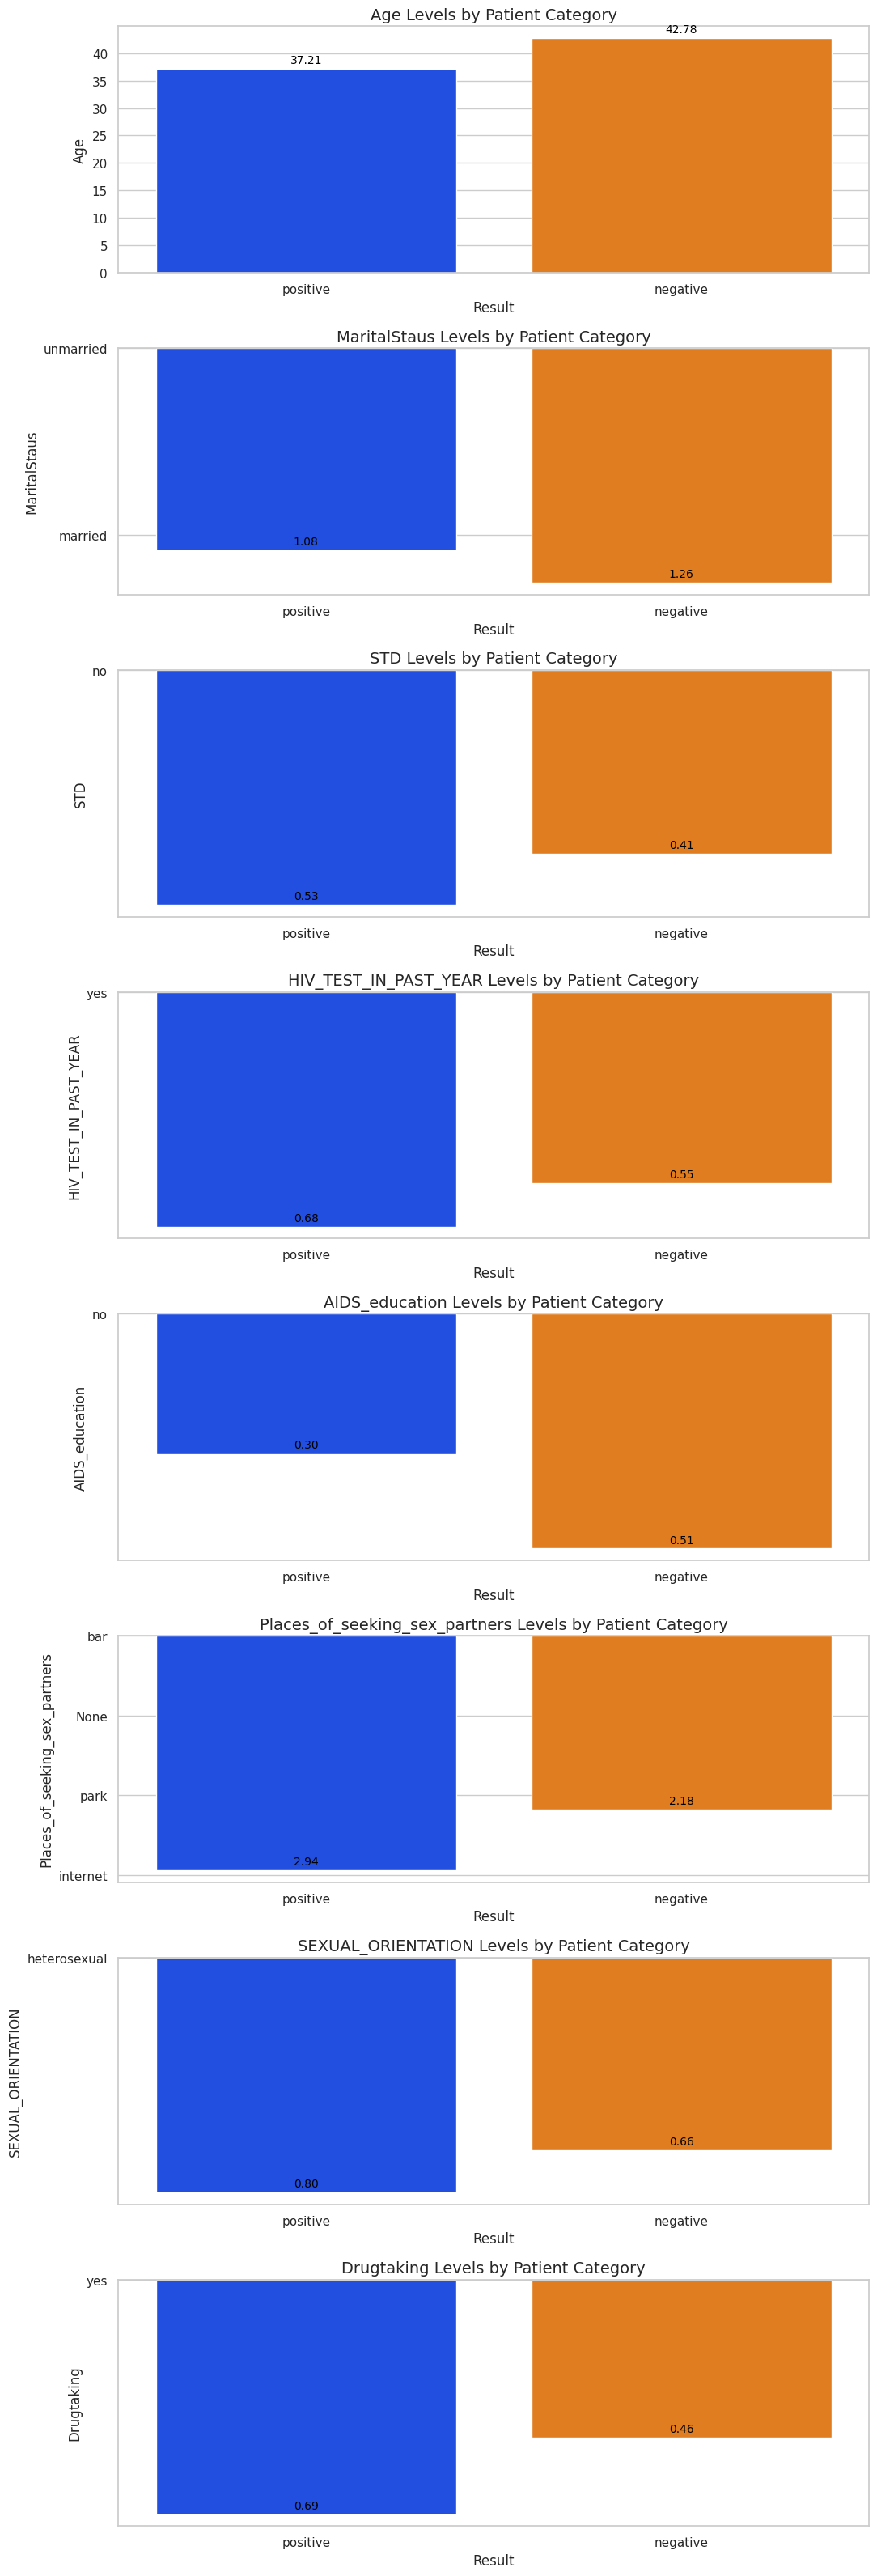

In [ ]:
# Define the variables we want to analyze
variables = ['Age', 'MaritalStaus', 'STD',  'HIV_TEST_IN_PAST_YEAR', 'AIDS_education', 'Places_of_seeking_sex_partners', 'SEXUAL_ORIENTATION', 'Drugtaking']

# Set up the figure
plt.figure(figsize=(11, len(variables) * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    bars = sns.barplot(data=data, x='Result', y=var, ci=None, palette='bright')

    # Annotate each bar with its height
    for p in bars.patches:
        bars.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

    # Add titles and labels
    plt.title(f'{var} Levels by Patient Category', fontsize=14)
    plt.xlabel('Result', fontsize=12)
    plt.ylabel(var, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter the data for '1=positive' and '0=negative'
filtered_data = data[data['Result'].isin(['1=positive', '0=negative'])]

# Ensure that the filtered dataframe is not empty
if not filtered_data.empty:
    # Calculate mean values for the selected variables
    mean_values = filtered_data.groupby('Result')[['STD', 'Places_of_seeking_sex_partners', 'SEXUAL_ORIENTATION']].mean().reset_index()

    # Set up the figure
    plt.figure(figsize=(15, 6))

    # Create stacked bar plot
    plt.bar(mean_values['Result'], mean_values['STD'], color='lightcoral', label='STD Status')
    plt.bar(mean_values['Result'], mean_values['Places_of_seeking_sex_partners'], color='lightblue',
            bottom=mean_values['STD'], label='Places of Seeking Sex Partners')
    plt.bar(mean_values['Result'], mean_values['SEXUAL_ORIENTATION'], color='lightgreen',
            bottom=mean_values['STD'] + mean_values['Places_of_seeking_sex_partners'], label='Sexual Orientation')

    # Add titles and labels
    plt.title('Average STD, Places of Seeking Sex Partners, and Sexual Orientation by Result', fontsize=16)
    plt.xlabel('Patient Groups', fontsize=14)
    plt.ylabel('Average Levels', fontsize=14)

    # Annotate bar values
    for i, category in enumerate(mean_values['Result']):
        total = (mean_values.loc[i, 'STD'] +
                 mean_values.loc[i, 'Places_of_seeking_sex_partners'] +
                 mean_values.loc[i, 'SEXUAL_ORIENTATION'])
        plt.text(i, total + 0.1, f'{total:.2f}', ha='center', color='black', fontsize=12)

    # Add a legend
    plt.legend(loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the selected categories.")


No data available for the selected categories.


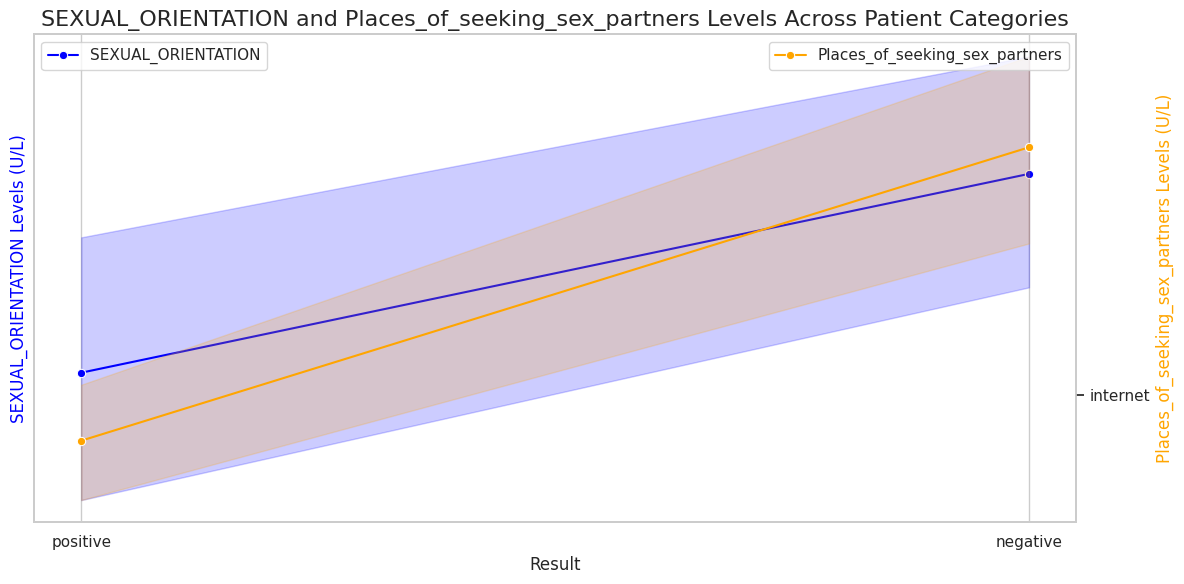

In [ ]:
# Configurar a figura e os dois eixos y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot ALT no eixo y primário
alt_plot = sns.lineplot(x='Result', y='SEXUAL_ORIENTATION', data=df, ax=ax1, label='SEXUAL_ORIENTATION', color='blue', marker='o')
ax1.set_ylabel('SEXUAL_ORIENTATION Levels (U/L)', fontsize=12, color='blue')

# Adicionar os números em cada ponto para ALT
# ... (previous code)

# Adicionar os números em cada ponto para ALT
for i, txt in enumerate(df['SEXUAL_ORIENTATION']):
    # Convert txt to a string representation if it's not already
    txt_str = str(txt)
    ax1.annotate(txt_str, (i, df['SEXUAL_ORIENTATION'].iloc[i]),
                 textcoords="offset points", xytext=(0,5),
                 ha='center', fontsize=10, color='blue')

# ... (rest of the code)
# Criar um eixo y secundário para AST
ax2 = ax1.twinx()
ast_plot = sns.lineplot(x='Result', y='Places_of_seeking_sex_partners', data=df, ax=ax2, label='Places_of_seeking_sex_partners', color='orange', marker='o')
ax2.set_ylabel('Places_of_seeking_sex_partners Levels (U/L)', fontsize=12, color='orange')

# Adicionar os números em cada ponto para AST
# ... (previous code)

# Adicionar os números em cada ponto para AST
for i, txt in enumerate(df['Places_of_seeking_sex_partners']):
    # Convert txt to a numeric type if possible, otherwise keep it as a string
    try:
        txt_num = float(txt)
        ax2.annotate(f'{txt_num:.0f}', (i, df['Places_of_seeking_sex_partners'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='orange')
    except ValueError:
        ax2.annotate(txt, (i, df['Places_of_seeking_sex_partners'].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color='orange')

# ... (rest of the code)
# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionar um título
plt.title('SEXUAL_ORIENTATION and Places_of_seeking_sex_partners Levels Across Patient Categories', fontsize=16)

# Adicionar legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Exibir o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

# **Feature engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
data[label_col]= data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Saved dataset with Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

In [ ]:
data.head()

,Age,MaritalStaus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drugtaking,Result
0,22,3,0,1,0,1,1,1,1
1,20,3,0,0,1,0,1,0,0
2,23,2,1,0,1,0,0,0,0
3,24,2,0,1,1,4,1,1,1
4,18,3,1,1,0,2,1,1,1


In [ ]:
# Split the data into features (X) and target (y)

X = data.drop("Result", axis=1) # Drop the target column to get the features
y = data["Result"] # Set the target column


In [ ]:
X.shape

(698, 8)

In [ ]:
y.shape

(698,)

# **Model training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print(f"Rows and columns of training data X_train:{X_train.shape}")
print(f"Rows and columns of training data y_train:{y_train.shape}")
print(f"Rows and columns of Test data X_train:{X_test.shape}")
print(f"Rows and columns of test data y_train:{y_test.shape}")

Rows and columns of training data X_train:(558, 8)
Rows and columns of training data y_train:(558,)
Rows and columns of Test data X_train:(140, 8)
Rows and columns of test data y_train:(140,)


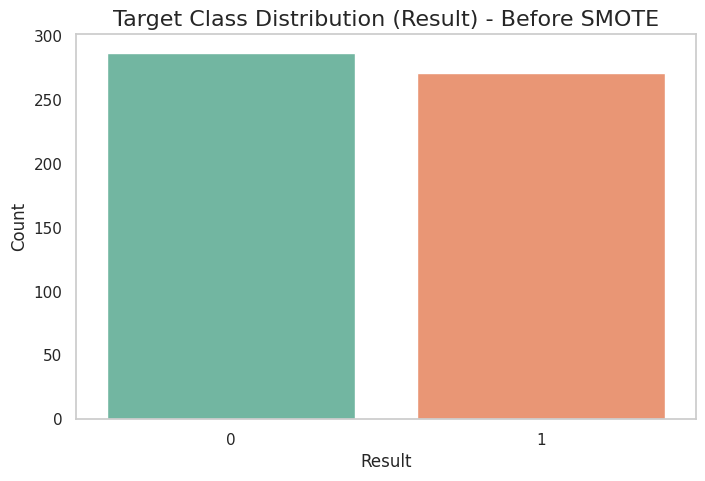


Class distribution before SMOTE:
Result
0    287
1    271
Name: count, dtype: int64


In [ ]:
import pandas as pd # Import pandas library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='Set2')
plt.title('Target Class Distribution (Result) - Before SMOTE', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution before SMOTE:\n{pd.Series(y_train).value_counts()}")

In [ ]:
breaks = jenks_breaks(df['Age'], n_classes=4)
df['AgeGroup'] = pd.cut(df['Age'], bins=breaks, labels=['18–21', '22–24', '25–34', '35+'])

Rows and columns of training data X_train_resampled:(542, 8)
Rows and columns of training data y_train_resampled:(542,)


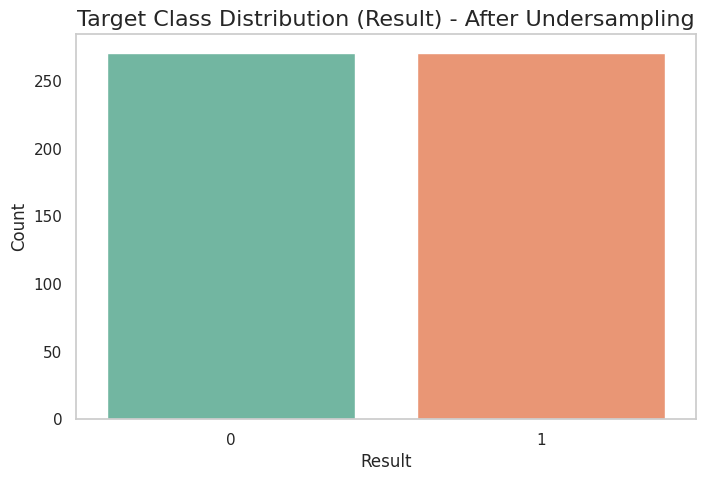


Class distribution after Undersampling:
Result
0    271
1    271
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Visualize training data after undersampling
print(f"Rows and columns of training data X_train_resampled:{X_train_resampled.shape}")
print(f"Rows and columns of training data y_train_resampled:{y_train_resampled.shape}")

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, palette='Set2')
plt.title('Target Class Distribution (Result) - After Undersampling', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution after Undersampling:\n{pd.Series(y_train_resampled).value_counts()}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE with fewer neighbors to the training set to balance the classes
smote = SMOTE(k_neighbors=2, random_state=42)  # Reduce k_neighbors to 2 or any number < 5
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Viewing the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
Result
0    287
1    287
Name: count, dtype: int64


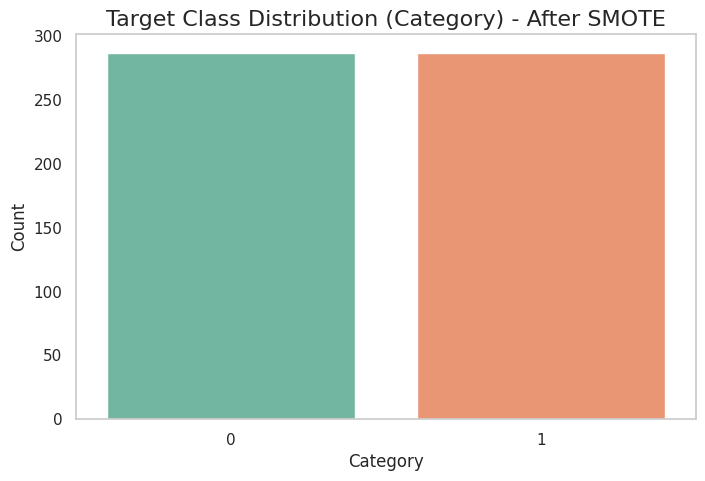


Class distribution after SMOTE:
Result
0    287
1    287
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, palette='Set2')
plt.title('Target Class Distribution (Category) - After SMOTE', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(False)
plt.show()

print()
print(f"Class distribution after SMOTE:\n{pd.Series(y_train_res).value_counts()}")


# **Part 8 - Machine learning models**

**Model Implementation and Data Splitting**

At the fifth stage of the project, I am focused on implementing machine learning models. I am developing eight distinct algorithms for analysis, which include Logistic Regression, Naive Bayes, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, and LightGBM. This diversity of algorithms allows us to explore different approaches and techniques for the problem at hand. During the training process, we closely monitor the performance of each model, aiming to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial as it allows us to evaluate and compare the performance of each algorithm, thereby selecting the most effective machine learning model for our specific application.

Throughout this stage, I am developing and training eight distinct machine learning algorithms. These algorithms were carefully selected to encompass a wide range of techniques and characteristics, aiming to capture the complexity and nuances of the data:
* SVC: SVC (Support Vector Classifier): SVC is a specific implementation of the Support Vector Machine algorithm that is designed specifically for classification tasks.
* Logistic Regression: A linear model used for solving binary classification
problems.

* Naive Bayes: A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

* Decision Tree: A model that uses a tree structure to represent hierarchical decision rules.

* Random Forest: An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

* AdaBoost: Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

* Gradient Boosting: An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

* XGBoost: An efficient implementation of gradient boosting, known for its speed and superior performance.

*  LightGBM: Another implementation of gradient boosting, designed to train models quickly and with efficient memory usage.
* ExtraTreesClassifier: Extra trees (short for extremely randomized trees) is an ensemble supervised machine learning method that uses decision trees and is used by the Train Using AutoML tool.


**Training and Evaluation**

Each of these algorithms is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.


**Selection of the Best Model**

At the end of this process, we will compare the performance of all models and select the one that shows the best results according to our evaluation criteria. This choice will be based not only on the performance metric but also on the interpretability of the model, its generalization capability, and its suitability to the problem requirements.

This meticulous and comprehensive approach will allow us to identify the most effective machine learning model to solve our specific problem, providing valuable insights and driving informed decision-making.

Best value of K: 1


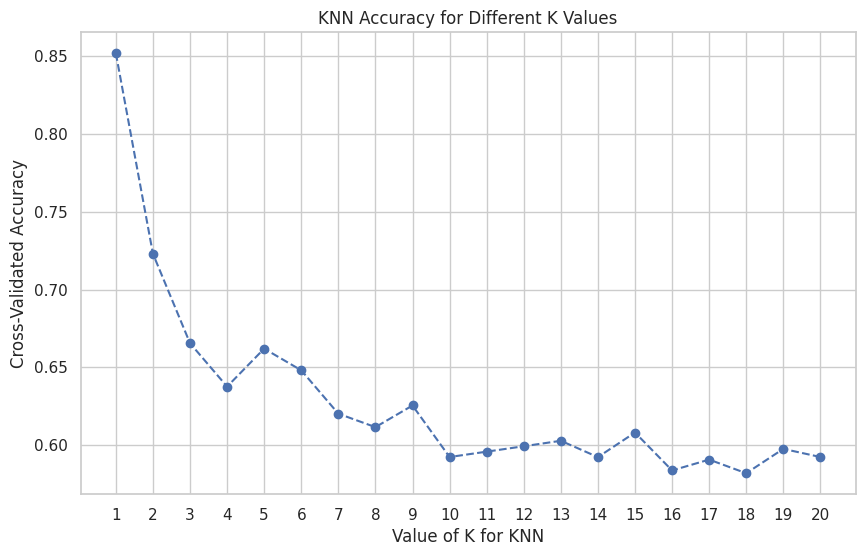

Accuracy of KNN with K=1: 0.8929


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # Import cross_val_score
from sklearn.metrics import accuracy_score


# ... (rest of your code)
# Define the range of K values to test
param_grid = {'n_neighbors': range(1, 21)}  # Testing K values from 1 to 20

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Apply GridSearchCV to find the best value of K
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=15, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Best value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K: {best_k}")

# Best KNN model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Range of K values to test
k_range = range(1, 21)

# Empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

print(f"Accuracy of KNN with K={best_k}: {accuracy:.4f}")

Best value of K: 1


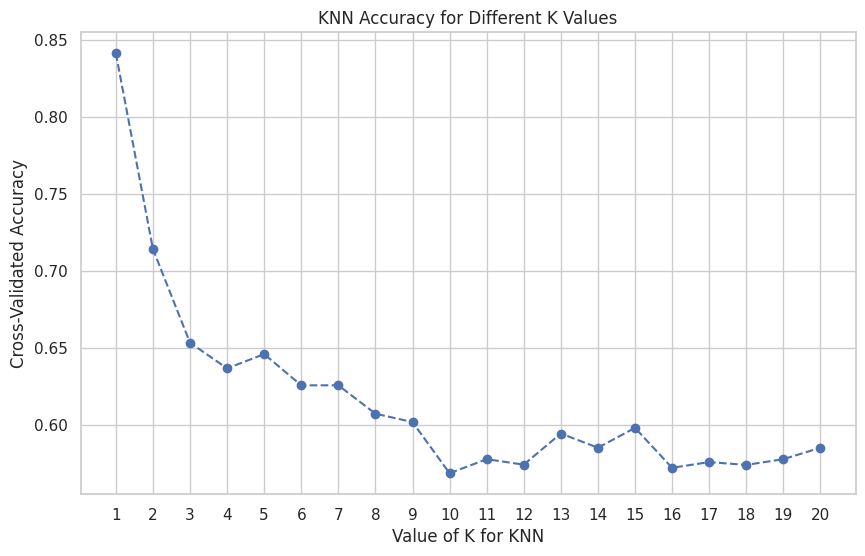

Accuracy of KNN with K=1: 0.8643


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score # Import cross_val_score
from sklearn.metrics import accuracy_score


# ... (rest of your code)
# Define the range of K values to test
param_grid = {'n_neighbors': range(1, 21)}  # Testing K values from 1 to 20

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Apply GridSearchCV to find the best value of K
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=15, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best value of K
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value of K: {best_k}")

# Best KNN model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Range of K values to test
k_range = range(1, 21)

# Empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the accuracy vs K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='dashed', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

print(f"Accuracy of KNN with K={best_k}: {accuracy:.4f}")

In [ ]:
def clean_column_names(data):
    data.columns = [re.sub(r"[^a-zA-Z0-9_]", "_", col) for col in data.columns]
    return data

In [ ]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the value of K based on the GridSearchCV results
k_value = 1  # Replace with the optimal value of K from your GridSearchCV

# Add ExtraTreesClassifier to the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=k_value, metric='manhattan'),  # Set K and distance metric
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),  # Suppress all logs and warnings
    "Extra Trees": ExtraTreesClassifier()  # 10th algorithm added
}

# Define parameter grids for each model, including ExtraTreesClassifier
param_grids = {
    'Logistic Regression': { 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Naive Bayes': {},  # Naive Bayes has fewer hyperparameters to tune
    'Decision Tree Classifier': {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'KNN': {'n_neighbors': range(1, 21), 'metric': ['manhattan']},  # Test different K values with Manhattan distance
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'LightGBM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 50, 100]},
    'Extra Trees': {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  # Hyperparameters for Extra Trees
}

# Step 3: Iterate through each model and apply GridSearchCV for hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    # Fetch the parameter grid for the current model
    param_grid = param_grids.get(model_name, {})

    # If param_grid is empty (e.g., Naive Bayes), skip tuning
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

        # Fit GridSearchCV with resampled training data
        grid_search.fit(X_train_res, y_train_res)

        # Best parameters and accuracy for the model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_

        # Evaluate the tuned model on the test set
        y_pred_best = best_model.predict(X_test)
        best_accuracy = accuracy_score(y_test, y_pred_best)
        print(f'{model_name} Best Accuracy: {best_accuracy:.2f}')
    else:
        # If no hyperparameters to tune, just fit and evaluate the model
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy without tuning: {accuracy:.2f}')

    print("-" * 60)


Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Logistic Regression Best Accuracy: 0.75
------------------------------------------------------------
Tuning hyperparameters for Naive Bayes...
Naive Bayes Accuracy without tuning: 0.69
------------------------------------------------------------
Tuning hyperparameters for Decision Tree Classifier...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Decision Tree Classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier Best Accuracy: 0.96
------------------------------------------------------------
Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Fo

Ensamble: combines Algorithms to check the accuracy for data prediction

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier

# # Example dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize models with best hyperparameters
# gradient_boosting = GradientBoostingClassifier(
#     n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
# )
# random_forest = RandomForestClassifier(
#     max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42
# )
# decision_tree = DecisionTreeClassifier(
#     max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=42
# )
# lightgbm = lgb.LGBMClassifier(
#     learning_rate=0.2, n_estimators=100, num_leaves=31, random_state=42
# )
# extra_trees = ExtraTreesClassifier(
#     max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42
# )
# xgboost = XGBClassifier(
#     n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss'
# )
# # Combine models using VotingClassifier
# ensemble_model = VotingClassifier(
#     estimators=[
#         ('Gradient Boosting', gradient_boosting),
#         ('Random Forest', random_forest),
#         ('Decision Tree', decision_tree),
#         ('XGBoost', xgboost)
#     ],
#     voting='soft'  # Use 'soft' for probability-based voting, 'hard' for majority voting
# )

# # Train ensemble model
# ensemble_model.fit(X_train, y_train)

# # Evaluate ensemble model
# y_pred = ensemble_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Ensemble Model Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Example dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with best hyperparameters
gradient_boosting = GradientBoostingClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
)
random_forest = RandomForestClassifier(
    max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42
)
decision_tree = DecisionTreeClassifier(
    max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=42
)
lightgbm = lgb.LGBMClassifier(
    learning_rate=0.2, n_estimators=100, num_leaves=31, random_state=42
)
extra_trees = ExtraTreesClassifier(
    max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42
)
xgboost = XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss'
)
# Combine models using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Gradient Boosting', gradient_boosting),
        ('Random Forest', random_forest),
        ('Decision Tree', decision_tree),
        ('XGBoost', xgboost)
    ],
    voting='soft'  # Use 'soft' for probability-based voting, 'hard' for majority voting
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate ensemble model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy:.2f}")

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300, 400]
}
random_search = RandomizedSearchCV(random_forest, param_distributions=param_grid, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(f"Ensemble Model Accuracy: {accuracy:.2f}")

Ensemble Model Accuracy: 0.96
Ensemble Model Accuracy: 0.96


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train_res, y_train_res)

y_pred_catboost = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {catboost_accuracy:.2f}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00
CatBoost Accuracy: 0.95


# **Evaluation and metrics**



**Part 11.0 - Confusion matrix**

Training Logistic Regression...


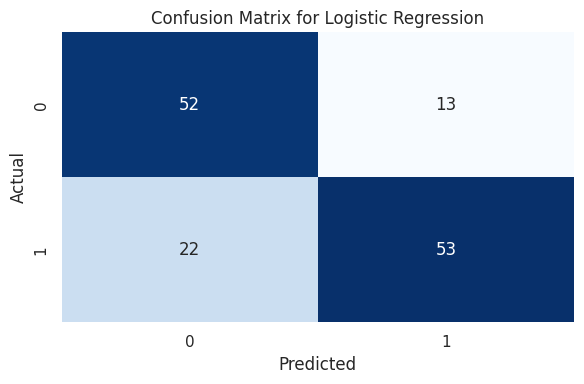

------------------------------------------------------------
Training Naive Bayes...


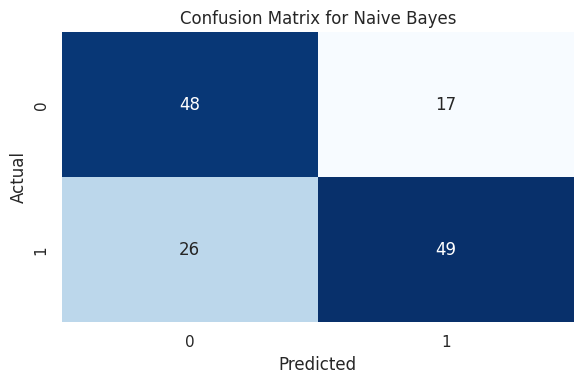

------------------------------------------------------------
Training Decision Tree Classifier...


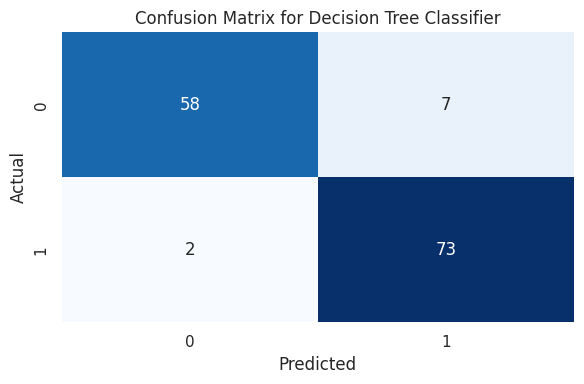

------------------------------------------------------------
Training Random Forest...


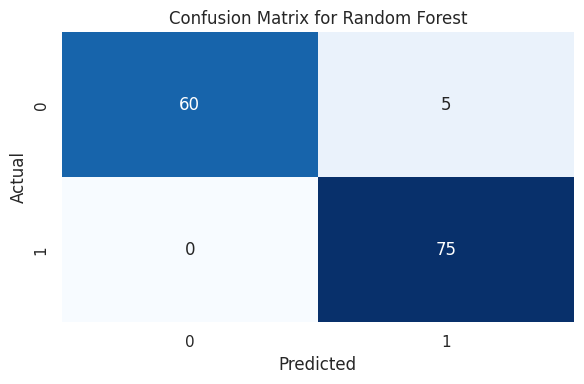

------------------------------------------------------------
Training KNN...


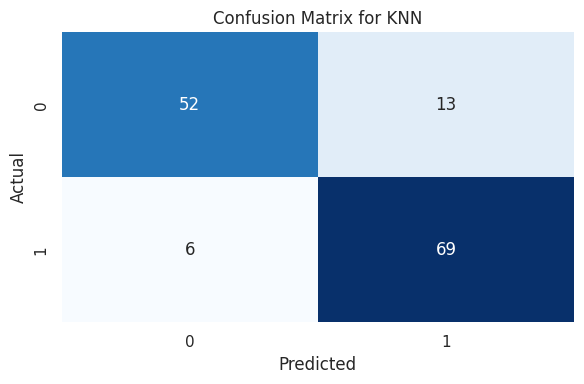

------------------------------------------------------------
Training AdaBoost...


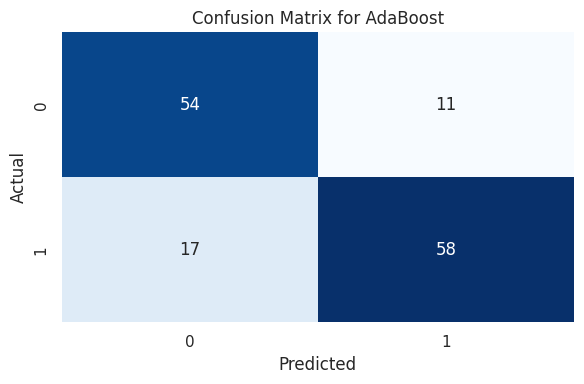

------------------------------------------------------------
Training Gradient Boosting...


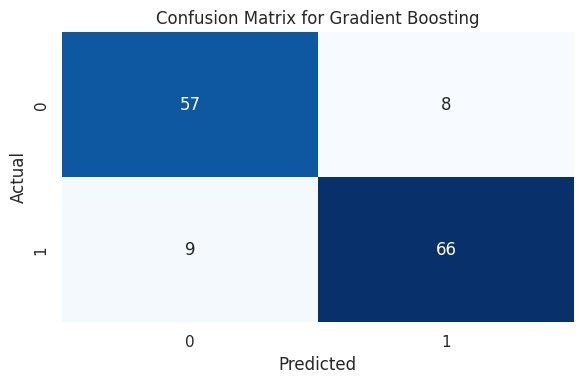

------------------------------------------------------------
Training XGBoost...


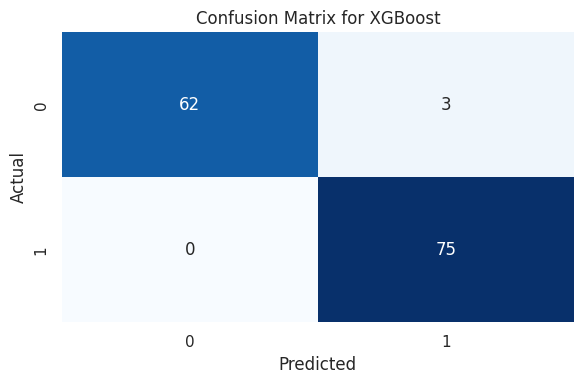

------------------------------------------------------------
Training SVC...


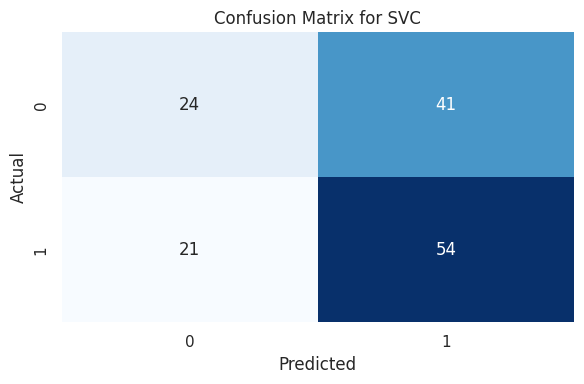

------------------------------------------------------------
Training LightGBM...


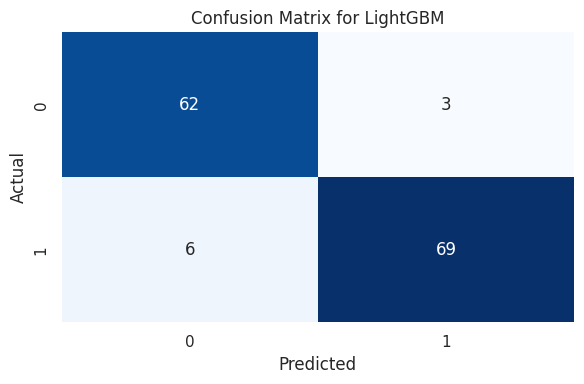

------------------------------------------------------------
Training Extra Trees...


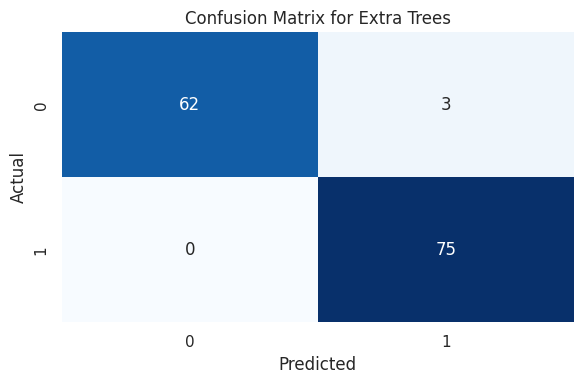

------------------------------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix

# Step 4: Iterate over models and plot confusion matrix for each
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model with the balanced dataset
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 5: Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Step 6: Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

**Part 11.1 -Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()# Suppress all logs and warnings
}

# Step 2: Iterate over models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model on the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)

    print("-" * 60)

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        65
           1       0.80      0.71      0.75        75

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.75      0.75       140

------------------------------------------------------------
Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        65
           1       0.74      0.65      0.70        75

    accuracy                           0.69       140
   macro avg       0.70      0.70      0.69       140
weighted avg       0.70      0.69      0.69       140

------------------------------------------------------------
Training Decision Tree Classifier...
Classification Report for Decision Tree Class

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Model dictionary with 8 models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Extra Trees": ExtraTreesClassifier()  # Suppress all logs and warnings
}

# Example dataset split (You should replace this with your actual data)
# X_train_res, X_test, y_train_res, y_test = train_test_split(X, y, test_size=0.2)

# Initialize an empty list to store the metrics for each model
metrics_list = []

# Step 2: Iterate over models
for model_name, model in models.items():
    # Train the model with the balanced data
    model.fit(X_train_res, y_train_res)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Step 3: Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics for this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score (or you can choose Accuracy)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model row in green (or any color)
def highlight_best(s):
    return ['background-color: green' if s.name == best_model_idx else '' for _ in s]

# Apply the highlighting function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.750000,0.756450,0.750000,0.750115
1,Naive Bayes,0.692857,0.698886,0.692857,0.692998
2,Decision Tree Classifier,0.950000,0.950682,0.950000,0.949900
3,Random Forest,0.978571,0.979396,0.978571,0.978528
4,AdaBoost,0.800000,0.803429,0.800000,0.800245
5,Gradient Boosting,0.878571,0.878773,0.878571,0.878627
6,XGBoost,0.978571,0.979396,0.978571,0.978528
7,SVC,0.557143,0.552130,0.557143,0.542934
8,LightGBM,0.935714,0.936712,0.935714,0.935783
9,Extra Trees,0.964286,0.966518,0.964286,0.964147


# **Test Model**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             698 non-null    int64
 1   MaritalStaus                    698 non-null    int64
 2   STD                             698 non-null    int64
 3   HIV_TEST_IN_PAST_YEAR           698 non-null    int64
 4   AIDS_education                  698 non-null    int64
 5   Places_of_seeking_sex_partners  698 non-null    int64
 6   SEXUAL_ORIENTATION              698 non-null    int64
 7   Drugtaking                      698 non-null    int64
 8   Result                          698 non-null    int64
dtypes: int64(9)
memory usage: 49.2 KB


In [ ]:
df

,Age,MaritalStaus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drugtaking,Result
0,22,unmarried,no,yes,no,bar,heterosexual,yes,positive
1,20,unmarried,no,no,yes,NaN,heterosexual,no,negative
2,23,married,yes,no,yes,NaN,bisexual,no,negative
3,24,married,no,yes,yes,park,heterosexual,yes,positive
4,18,unmarried,yes,yes,no,internet,heterosexual,yes,positive
...,...,...,...,...,...,...,...,...,...
693,19,unmarried,yes,no,no,internet,heterosexual,no,positive
694,47,married,no,no,yes,bar,bisexual,no,negative
695,34,unmarried,yes,yes,yes,park,homosexual,yes,negative
696,25,married,no,no,no,public bath,heterosexual,yes,positive


In [ ]:
data

,Age,MaritalStaus,STD,HIV_TEST_IN_PAST_YEAR,AIDS_education,Places_of_seeking_sex_partners,SEXUAL_ORIENTATION,Drugtaking,Result
0,22,3,0,1,0,1,1,1,1
1,20,3,0,0,1,0,1,0,0
2,23,2,1,0,1,0,0,0,0
3,24,2,0,1,1,4,1,1,1
4,18,3,1,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...
693,19,3,1,0,0,2,1,0,1
694,47,2,0,0,1,1,0,0,0
695,34,3,1,1,1,4,3,1,0
696,25,2,0,0,0,5,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Instantiate and train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [19, 4,1, 2, 1, 2, 0, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = rf.predict(new_input)
    prediction_proba = rf.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")



Predict Patient By Given Data
HIV Positive!


In [ ]:
from xgboost import XGBClassifier
import numpy as np

# Instantiate and train the RandomForestClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [19, 4,1, 2, 1, 0, 2, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = xgb_model.predict(new_input)
    prediction_proba = xgb_model.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")



Predict Patient By Given Data
HIV NEGETIVE!


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Instantiate and train the ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [19, 4, 1, 2, 1, 0, 2, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = et_model.predict(new_input)
    prediction_proba = et_model.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")


Predict Patient By Given Data
HIV NEGETIVE!


In [ ]:
from lightgbm import LGBMClassifier
import numpy as np

# Instantiate and train the LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [19, 4, 1, 2, 1, 0, 2, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = lgbm_model.predict(new_input)
    prediction_proba = lgbm_model.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")


Predict Patient By Given Data
HIV NEGETIVE!


In [ ]:
from sklearn.svm import SVC
import numpy as np

# Instantiate and train the SVC
svc_model = SVC(random_state=42, probability=True)  # probability=True for predict_proba
svc_model.fit(X_train_res, y_train_res)

# Test new data
new_inputs = np.array([
    [19, 4, 1, 2, 1, 0, 2, 1],
])

print("\nPredict Patient By Given Data")
# Iterate over each row of inputs for prediction
for new_input in new_inputs:
    # Reshape the new_input to match the expected input shape (1, n_features)
    new_input = new_input.reshape(1, -1)

    # Make predictions
    prediction = svc_model.predict(new_input)
    prediction_proba = svc_model.predict_proba(new_input)  # Use predict_proba for probability estimates

    patient_predict = prediction[0]
    if patient_predict == 0:
        print("HIV NEGETIVE!")
    elif patient_predict == 1:
        print("HIV Positive!")

    # Optional: Print prediction probabilities
    #print(f"Prediction Probabilities: {prediction_proba}")


Predict Patient By Given Data
HIV Positive!


In [ ]:
!pip install jenkspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.9/650.9 kB 24.0 MB/s eta 0:00:00


In [ ]:
from jenkspy import jenks_breaks

In [ ]:
breaks = jenks_breaks(df['Age'], n_classes=4)
df['AgeGroup'] = pd.cut(df['Age'], bins=breaks, labels=['18–21', '22–24', '25–34', '35+'])

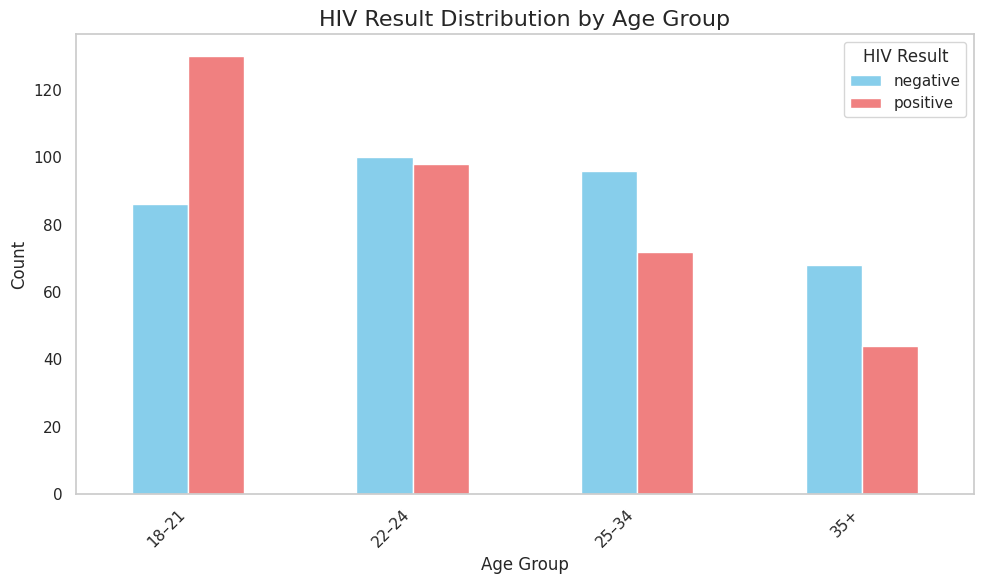

In [ ]:
# prompt: [Figure: Age-risk relationship] confirms elevated risk in the 22–24 cohort.

import matplotlib.pyplot as plt
# Calculate the count of each HIV result within each age group
age_result_counts = df.groupby('AgeGroup')['Result'].value_counts().unstack().fillna(0)

# Create a bar plot
ax = age_result_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add title and labels
plt.title('HIV Result Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Highlight the "22–24" bar
# Find the index of the '22–24' age group in the x-axis ticks
age_group_labels = [item.get_text() for item in ax.get_xticklabels()]
try:
    highlight_index = age_group_labels.index('22–24')
    # Get the bars for the '22–24' index
    bars = ax.patches
    # Determine which bars correspond to the '22–24' age group
    # This depends on how the bars are ordered (usually grouped by x-tick)
    # In this case, with 2 result categories, the bars for '22-24' are at indices 2*highlight_index and 2*highlight_index + 1
    # You might need to adjust this logic based on your specific plot structure
    for i in range(len(age_result_counts.columns)): # Iterate through the bars for this age group
         bar_index = highlight_index * len(age_result_counts.columns) + i



except ValueError:
    print("Age group '22–24' not found in the data.")

# Add legend
plt.legend(title='HIV Result')

# Display the plot
plt.tight_layout()
plt.grid(False)
plt.show()


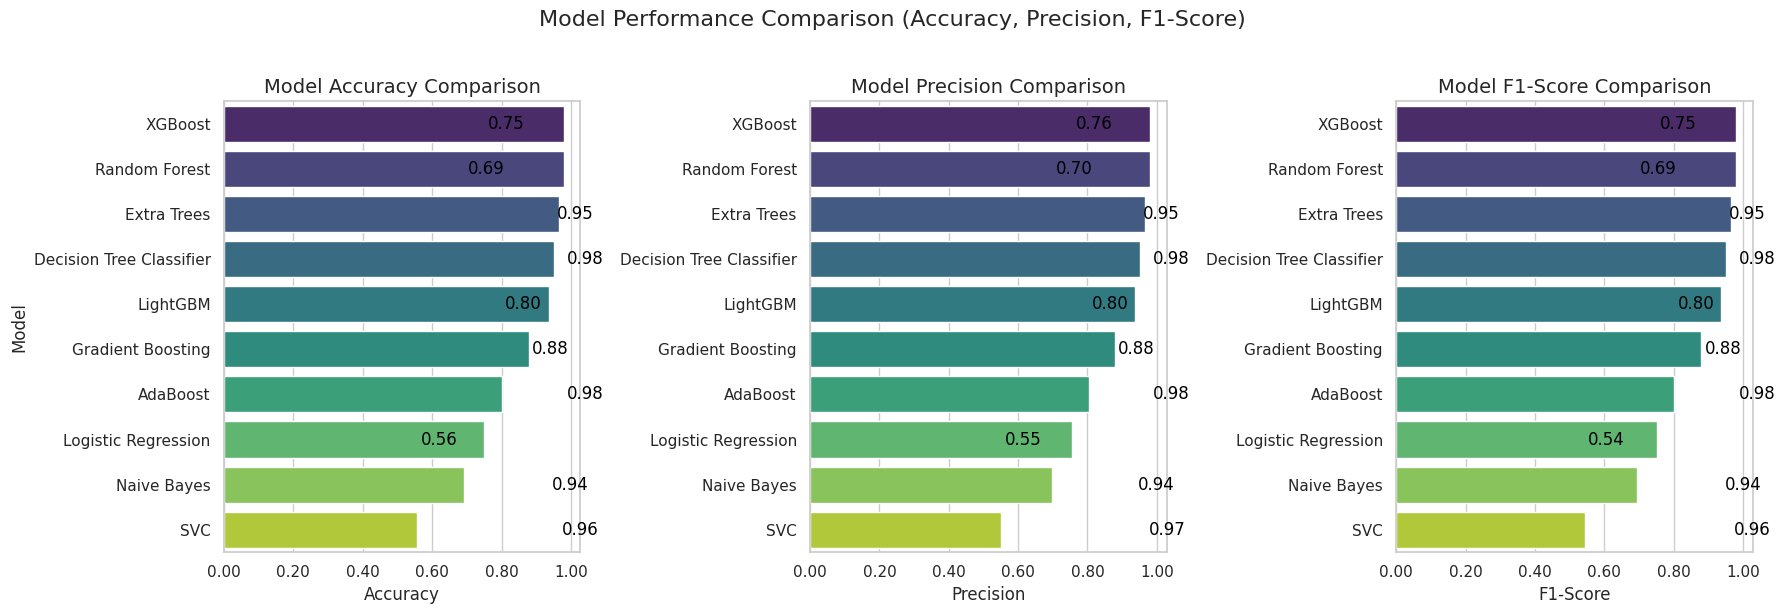

In [ ]:
# prompt: [Figure 5: Model architecture comparison]

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the subplots

# Define a color palette for consistent visualization
palette = 'viridis'

# Plot 1: Model Accuracy Comparison
metrics_df_sorted_acc = metrics_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Accuracy', y='Model', data=metrics_df_sorted_acc, ax=axes[0], palette=palette)
axes[0].set_title('Model Accuracy Comparison', fontsize=14)
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

# Add values to the bars for Accuracy
for index, row in metrics_df_sorted_acc.iterrows():
    axes[0].text(row['Accuracy'] + 0.01, index, f'{row["Accuracy"]:.2f}', color='black', ha="left", va="center")

# Plot 2: Model Precision Comparison
metrics_df_sorted_prec = metrics_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Precision', y='Model', data=metrics_df_sorted_prec, ax=axes[1], palette=palette)
axes[1].set_title('Model Precision Comparison', fontsize=14)
axes[1].set_xlabel('Precision', fontsize=12)
axes[1].set_ylabel('') # Remove y-label to avoid redundancy
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

# Add values to the bars for Precision
for index, row in metrics_df_sorted_prec.iterrows():
    axes[1].text(row['Precision'] + 0.01, index, f'{row["Precision"]:.2f}', color='black', ha="left", va="center")

# Plot 3: Model F1-Score Comparison
metrics_df_sorted_f1 = metrics_df.sort_values(by='F1-Score', ascending=False)
sns.barplot(x='F1-Score', y='Model', data=metrics_df_sorted_f1, ax=axes[2], palette=palette)
axes[2].set_title('Model F1-Score Comparison', fontsize=14)
axes[2].set_xlabel('F1-Score', fontsize=12)
axes[2].set_ylabel('') # Remove y-label to avoid redundancy
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

# Add values to the bars for F1-Score
for index, row in metrics_df_sorted_f1.iterrows():
    axes[2].text(row['F1-Score'] + 0.01, index, f'{row["F1-Score"]:.2f}', color='black', ha="left", va="center")

plt.suptitle('Model Performance Comparison (Accuracy, Precision, F1-Score)', fontsize=16, y=1.02) # Add a super title

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

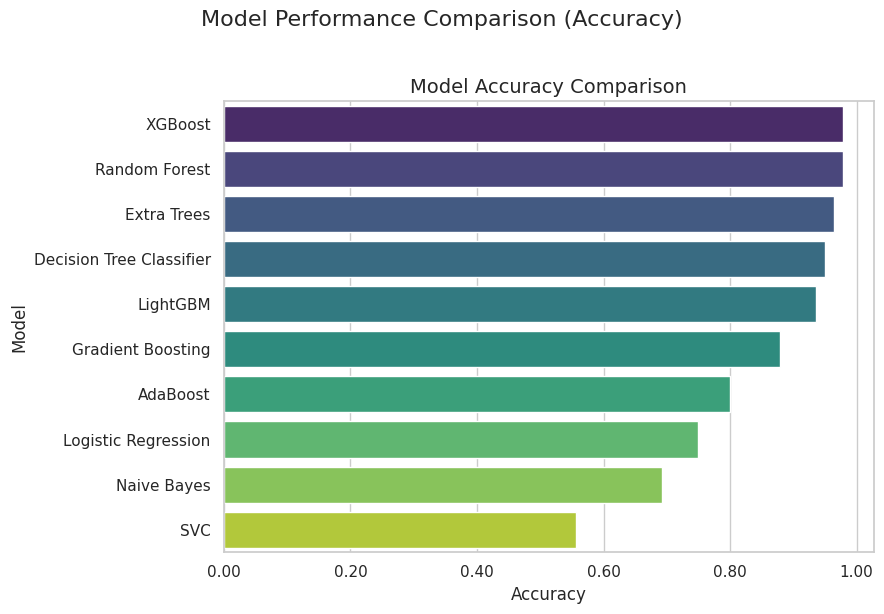

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(9, 6))  # 1 row, 3 columns for the subplots

# Define a color palette for consistent visualization
palette = 'viridis'

# Plot 1: Model Accuracy Comparison
metrics_df_sorted_acc = metrics_df.sort_values(by='Accuracy', ascending=False)
sns.barplot(x='Accuracy', y='Model', data=metrics_df_sorted_acc, ax=axes, palette=palette)
axes.set_title('Model Accuracy Comparison', fontsize=14)
axes.set_xlabel('Accuracy', fontsize=12)
axes.set_ylabel('Model', fontsize=12)
axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

# Add values to the bars for Accuracy
# for index, row in metrics_df_sorted_acc.iterrows():
#     axes.text(row['Accuracy'] + 0.01, index, f'{row["Accuracy"]:.2f}', color='black', ha="left", va="center")

plt.suptitle('Model Performance Comparison (Accuracy)', fontsize=16, y=1.02) # Add a super title

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

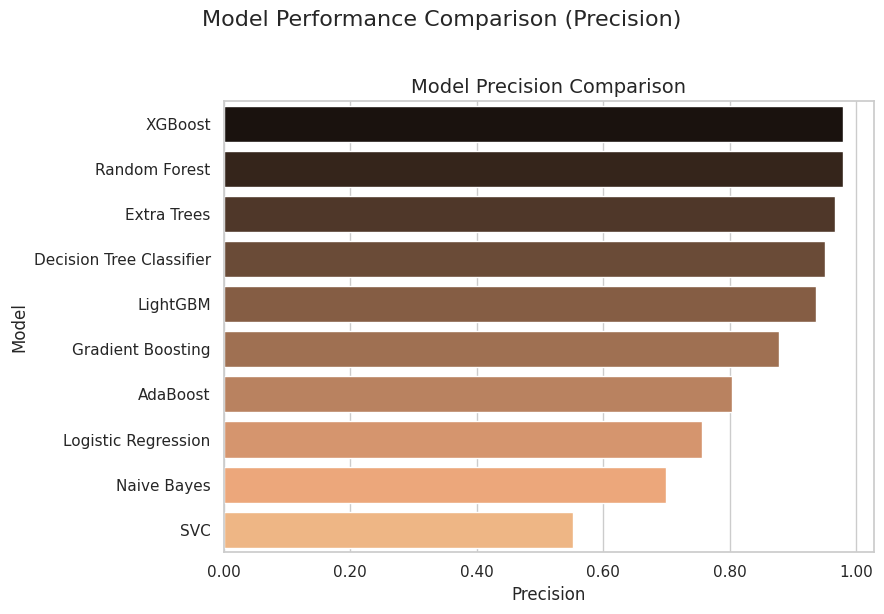

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(9, 6))  # 1 row, 3 columns for the subplots

# Define a color palette for consistent visualization
palette = 'copper'

# Plot 1: Model Accuracy Comparison
metrics_df_sorted_prec = metrics_df.sort_values(by='Precision', ascending=False)
sns.barplot(x='Precision', y='Model', data=metrics_df_sorted_prec, ax=axes, palette=palette)
axes.set_title('Model Precision Comparison', fontsize=14)
axes.set_xlabel('Precision', fontsize=12)
axes.set_ylabel('Model', fontsize=12)
axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

# Add values to the bars for Accuracy
# for index, row in metrics_df_sorted_acc.iterrows():
#     axes.text(row['Accuracy'] + 0.01, index, f'{row["Accuracy"]:.2f}', color='black', ha="left", va="center")

plt.suptitle('Model Performance Comparison (Precision)', fontsize=16, y=1.02) # Add a super title

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

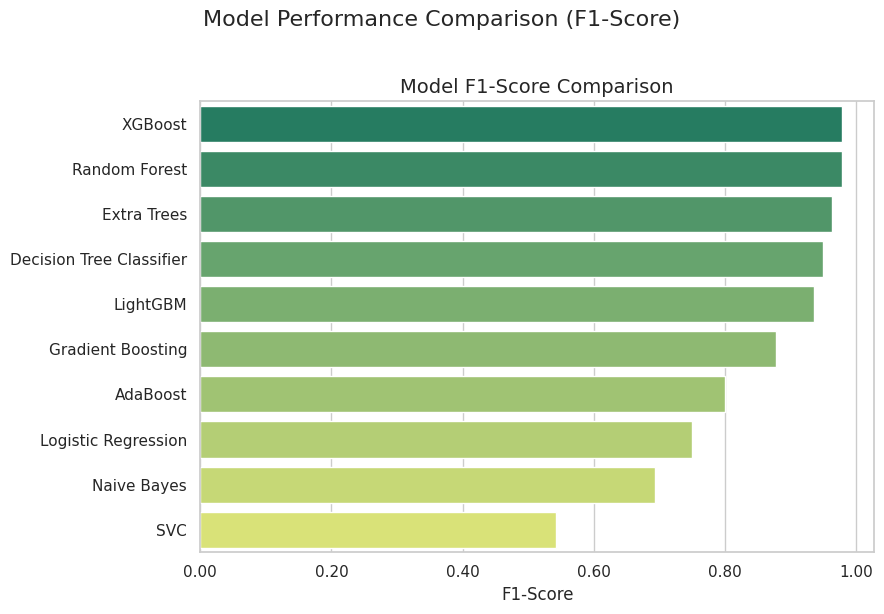

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(9, 6))  # 1 row, 3 columns for the subplots

# Define a color palette for consistent visualization
palette = 'summer'

metrics_df_sorted_f1 = metrics_df.sort_values(by='F1-Score', ascending=False)
sns.barplot(x='F1-Score', y='Model', data=metrics_df_sorted_f1, ax=axes, palette=palette)
axes.set_title('Model F1-Score Comparison', fontsize=14)
axes.set_xlabel('F1-Score', fontsize=12)
axes.set_ylabel('') # Remove y-label to avoid redundancy
axes.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}')) # Format x-axis to 2 decimal places

plt.suptitle('Model Performance Comparison (F1-Score)', fontsize=16, y=1.02) # Add a super title

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
!pip install shap

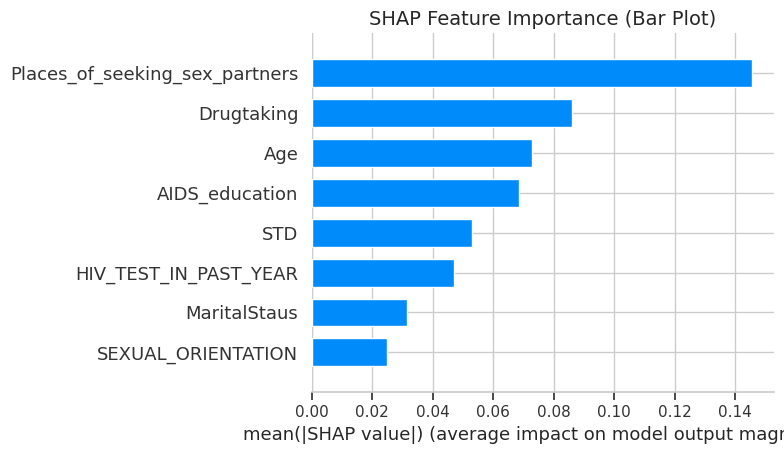

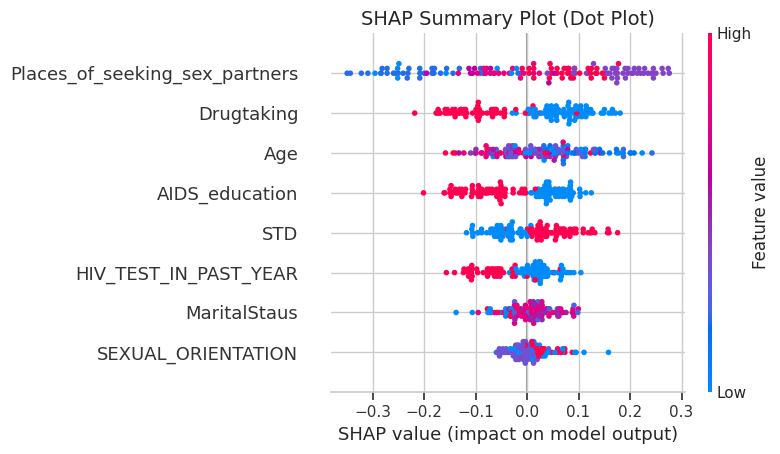

In [ ]:
import matplotlib.pyplot as plt
# Ensure shap is installed

import shap
import numpy as np # Import numpy
import pandas as pd # Import pandas to ensure data is in expected format
import re # Import re for cleaning column names
from sklearn.ensemble import RandomForestClassifier # Ensure the model class is imported

# Select one of your trained models (e.g., the best performing one based on your metrics)
# For demonstration, let's use the RandomForestClassifier as trained earlier:
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train_res, y_train_res)
# You might want to use the `best_model` from your GridSearchCV if available

# Let's use the RandomForestClassifier trained on the balanced data (X_train_res, y_train_res)
# Make sure X_train_res and y_train_res are available from previous cells
# If not, you might need to re-run the relevant cells to define them.
# Assuming X_train_res and y_train_res are already defined and trained.
# If using a different model, ensure it's trained on X_train_res, y_train_res
# and that the explainer type is compatible with the model (e.g., TreeExplainer for tree models).
# For this fix, we'll assume `final_model` is already trained and is a tree-based model.
# final_model = RandomForestClassifier(random_state=42)
# final_model.fit(X_train_res, y_train_res)

# Ensure X_test is a pandas DataFrame, which SHAP often works best with
# and ensure it has the same column names as X_train_res
if not isinstance(X_test, pd.DataFrame):
    # Assuming X_test has the same column order as X_train_res
    X_test_df = pd.DataFrame(X_test, columns=X_train_res.columns)
else:
    X_test_df = X_test.copy() # Work on a copy to avoid modifying the original

# Clean column names in X_test_df to avoid potential issues with special characters
# Use the clean_column_names function if defined elsewhere, otherwise define it here
def clean_column_names(df):
    df.columns = [re.sub(r"[^a-zA-Z0-9_]", "_", col) for col in df.columns]
    return df

X_test_df = clean_column_names(X_test_df)

# Create a SHAP Explainer for tree-based models
# If your model is not tree-based, you'll need a different explainer (e.g., shap.KernelExplainer)
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the test set
# The output shape will be (number_of_samples, number_of_features, number_of_classes) for classification
shap_values = explainer.shap_values(X_test_df) # Use the cleaned DataFrame

# Assuming binary classification, shap_values will be a list with two elements.
# shap_values[0] corresponds to the SHAP values for the first class (likely 0),
# and shap_values[1] corresponds to the SHAP values for the second class (likely 1).
# For the summary plot, it's common to use the SHAP values for the positive class.
# Let's assume class 1 is the positive class based on the previous analysis.

# Select the SHAP values for the positive class (class 1)
# Correctly index the class dimension (the third dimension)
# The shape of shap_values[:, :, 1] will be (number_of_samples, number_of_features) which is expected
shap_values_for_plot = shap_values[:, :, 1] # <--- Corrected slicing

# Generate the SHAP summary plot (bar chart)
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
# Pass the original data (with cleaned column names) to the features argument
# and the SHAP values for the positive class
shap.summary_plot(shap_values_for_plot, features=X_test_df, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Bar Plot)', fontsize=14)
plt.tight_layout() # Adjust layout
plt.show()

# Generate the default SHAP summary plot (dot plot)
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
# Pass the original data (with cleaned column names) to the features argument
# and the SHAP values for the positive class
shap.summary_plot(shap_values_for_plot, features=X_test_df, show=False)
plt.title('SHAP Summary Plot (Dot Plot)', fontsize=14)
plt.tight_layout() # Adjust layout
plt.show()

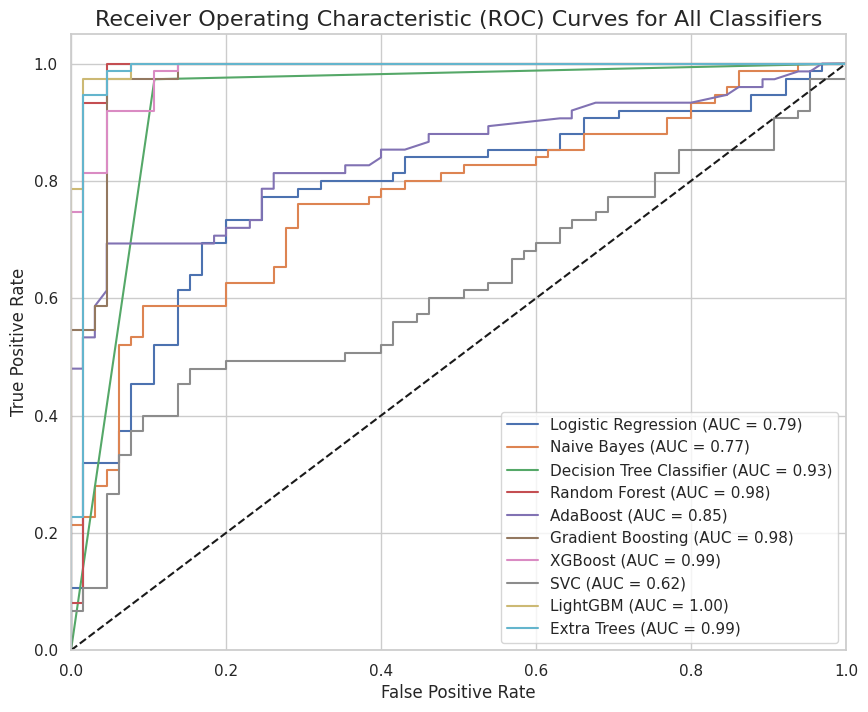

In [ ]:
# prompt: [figure 3: ROC curves for all classifiers]

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Re-initialize models with best hyperparameters from GridSearchCV or preferred settings
# (Assuming you have stored the best parameters from your GridSearchCV results)

# Example: replace these with your actual best parameters
best_lr = LogisticRegression(C=1, solver='liblinear') # Example params
best_nb = GaussianNB() # Example params
best_dt = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2) # Example params
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300) # Example params
best_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100) # Example params
best_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200) # Example params
best_xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, use_label_encoder=False, eval_metric='logloss') # Example params
best_svc = SVC(probability=True) # Example params (needs probability=True for ROC)
best_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=200, num_leaves=31, verbose=-1) # Example params
best_et = ExtraTreesClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100) # Example params


models_for_roc = {
    "Logistic Regression": best_lr,
    "Naive Bayes": best_nb,
    "Decision Tree Classifier": best_dt,
    "Random Forest": best_rf,
    "AdaBoost": best_ada,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb,
    "SVC": best_svc,
    "LightGBM": best_lgbm,
    "Extra Trees": best_et
}

plt.figure(figsize=(10, 8))

# Iterate through the models, train them on the balanced data, predict probabilities, and plot ROC
for name, model in models_for_roc.items():
    try:
        # Train the model on the balanced training data (X_train_res, y_train_res)
        model.fit(X_train_res, y_train_res)

        # Predict probabilities (for the positive class, which is likely 1 after encoding)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
             # For SVC, use decision_function and transform if not calibrated
             y_prob = model.decision_function(X_test)
             # Note: For reliable probabilities with SVC, it's best to set probability=True during initialization
             # and train with fit(..., probability=True) or calibrate using CalibratedClassifierCV
        else:
            print(f"Model {name} does not have predict_proba or decision_function.")
            continue

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    except Exception as e:
        print(f"Could not plot ROC for {name}: {e}")
        continue

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Classifiers', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Performing cross-validation for Logistic Regression...
Logistic Regression: Mean Accuracy = 0.6463
------------------------------
Performing cross-validation for Naive Bayes...
Naive Bayes: Mean Accuracy = 0.6481
------------------------------
Performing cross-validation for Decision Tree Classifier...
Decision Tree Classifier: Mean Accuracy = 0.9198
------------------------------
Performing cross-validation for Random Forest...
Random Forest: Mean Accuracy = 0.9267
------------------------------
Performing cross-validation for AdaBoost...
AdaBoost: Mean Accuracy = 0.7454
------------------------------
Performing cross-validation for Gradient Boosting...
Gradient Boosting: Mean Accuracy = 0.8205
------------------------------
Performing cross-validation for XGBoost...
XGBoost: Mean Accuracy = 0.9320
------------------------------
Performing cross-validation for SVC...
SVC: Mean Accuracy = 0.5748
------------------------------
Performing cross-validation for LightGBM...
LightGBM: Mean A

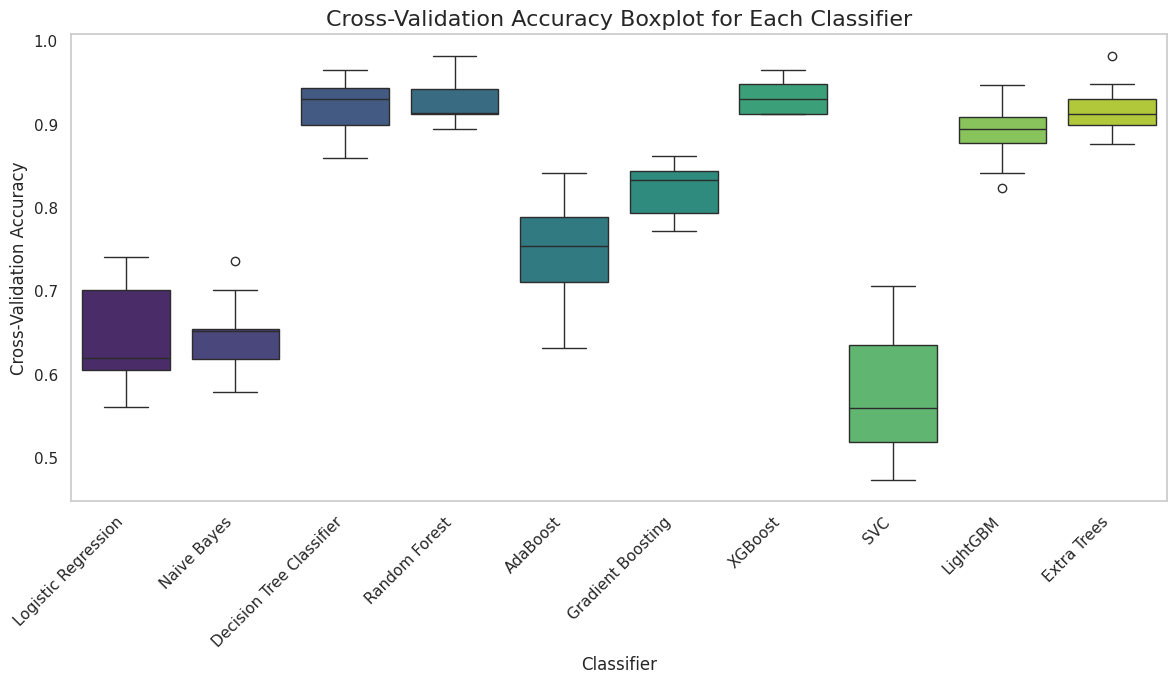

In [ ]:
# prompt: figure 7: cross-validation accuracy boxplot

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model and store the scores
cross_val_scores = {}
for model_name, model in models.items():
    print(f"Performing cross-validation for {model_name}...")
    # Use StratifiedKFold for cross-validation to maintain class distribution
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # You can adjust n_splits
    try:
        scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='accuracy')
        cross_val_scores[model_name] = scores
        print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}")
    except Exception as e:
        print(f"Could not perform cross-validation for {model_name}: {e}")
    print("-" * 30)

# Create a DataFrame from the cross-validation scores for easier plotting
cv_scores_df = pd.DataFrame(cross_val_scores)

# Create a boxplot to visualize the distribution of cross-validation accuracies
plt.figure(figsize=(12, 7))
sns.boxplot(data=cv_scores_df, palette='viridis')
plt.title('Cross-Validation Accuracy Boxplot for Each Classifier', fontsize=16)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.grid(axis='y')
plt.show()